In [ ]:
# import pandas as pd
# import glob
# import numpy as np

# # gensim
# import gensim
# from gensim.utils import simple_preprocess
# import gensim.corpora as corpora
# from gensim.models import CoherenceModel
# from tqdm import tqdm

In [15]:
from gensim.models import LdaModel
import pickle as pkl

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
from nltk.corpus import stopwords
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load raw corpus dataframe
with open('data/raw_corpus.pkl', 'rb') as f:
    corpus_df = pkl.load(f)
    
# load cleaned corpus
with open('data/cleaned_corpus.pkl', 'rb') as f:
    corpus = pkl.load(f)

In [3]:
# Optimal number of topics
nTopics = 17

In [4]:
# load model
fname = f'trained_models/trained_lda_model_{nTopics}'
lda_model = LdaModel.load(fname)

In [5]:
# define colors
def clamp(x): 
    return max(0, min(x, 255))

cols = [color for name, color in mcolors.XKCD_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)] 

for i in range(nTopics):
#     fig = plt.figure(figsize=(6,3), dpi=80, facecolor='w', edgecolor='k')
    r, g, b = tableau20[i]  
    cols[i] = "#{0:02x}{1:02x}{2:02x}".format(clamp(r), clamp(g), clamp(b))

In [6]:
#Wordcloud of Top N words in each topic
stop_words = stopwords.words('english')
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=3500,
                  height=3500,
                  max_words=15,
                  colormap='tab20',
                  color_func=lambda *args, **kwargs: tableau20[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False, num_topics=17)

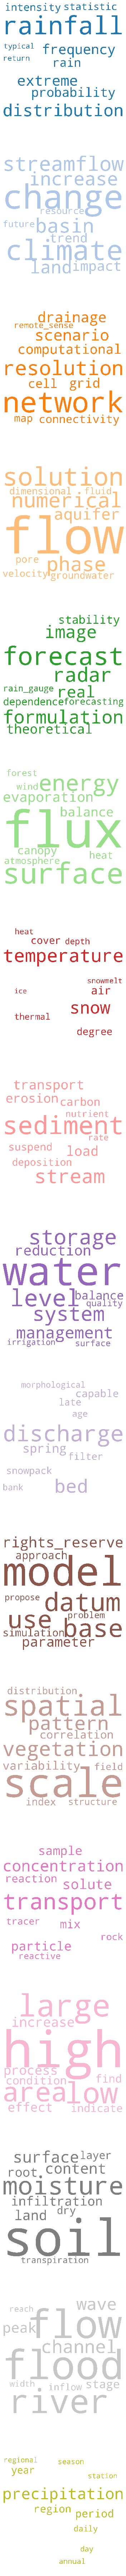

In [7]:
# Plot wordclouds

# init figure
fig, axes = plt.subplots(nTopics, 1, figsize=(5, 6*nTopics))

# subplots for wordclouds from each topic
for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=1500)
    plt.gca().imshow(cloud)
    plt.gca().axis('off')

# remove as much whitespace as possible
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [8]:
# run the model
doc_lda = lda_model[corpus]

In [41]:
doc_lda[i-3]

([(0, 0.051691703),
  (1, 0.01046155),
  (3, 0.16585657),
  (7, 0.015856752),
  (8, 0.036829155),
  (9, 0.017297007),
  (10, 0.19934268),
  (11, 0.025842484),
  (12, 0.028638387),
  (13, 0.32639396),
  (16, 0.10012601)],
 [(11, [13]),
  (14, [4]),
  (17, [13]),
  (21, [10, 13]),
  (27, [13, 16]),
  (39, [16, 13]),
  (47, [13]),
  (60, [10, 13, 3]),
  (61, [13, 3, 10]),
  (65, [13]),
  (100, [10]),
  (103, [9]),
  (107, [16]),
  (117, [16, 10, 8]),
  (121, [10, 13, 16]),
  (141, [13]),
  (151, []),
  (162, [8]),
  (172, [10, 13]),
  (179, [3]),
  (196, [13]),
  (214, [3]),
  (241, [10, 8]),
  (272, [10, 3, 8]),
  (277, [13, 11, 10, 3]),
  (279, [13]),
  (288, [8]),
  (305, [11]),
  (306, [10]),
  (308, [11]),
  (326, [3, 10]),
  (343, [13, 16, 1]),
  (351, [13, 3]),
  (352, [16]),
  (355, [13, 1]),
  (374, [0]),
  (400, [3, 0, 2]),
  (413, []),
  (420, [0]),
  (428, [0]),
  (466, [13, 7]),
  (467, [13, 10]),
  (473, [10, 13]),
  (489, [13, 16]),
  (552, [16]),
  (595, [13, 3, 10, 11]),


In [34]:
# Extract the topic probabilities for each paper

# init storage
hm = np.zeros([len(corpus), lda_model.num_topics])

# # loop over papers
# for paper in tqdm(range(len(corpus))):
#     pairs = lda_model[corpus[paper]][0]
#     for pair in pairs:
#         hm[paper, pair[0]] = pair[1]

# loop over papers
for i in tqdm(range(len(doc_lda))):
    for topic_pair in doc_lda[i][0]:
        hm[i, topic_pair[0]] = topic_pair[1]

IndexError: index 41175 is out of bounds for axis 1 with size 41175

In [ ]:
# create time series

# all years where we have data
years = np.unique(corpus_df['Year'])

# init storage (as a dictionary)
popularity_all_journals = np.zeros([len(years), lda_model.num_topics])

# loop through years
y = -1
for year in years:
    y = y+1
    
    # extract all papers in this year
    hm_year = hm[corpus_df['Year'] == year,:]

    # calculate topic popularity for this year
    popularity_all_journals[y,:] = np.sum(hm_year, axis=0) / np.sum(hm_year)

In [ ]:
# define plotting colors
import matplotlib.colors as mcolors

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)] 
# colorz=[color for name, color in mcolors.TABLEAU_COLORS.items()]

# define topic names
labels = ['Precipitation Extremes & Distributions',
          'Climate Change',
          'River Networks, Topography, & Scaling',
          'Hydrogeology',
          'Forecasting',
          'Energy Balance (Hydrometeorology, Land Surface)',
          'Snow and Ice',
          'Sediment & Erosion',
          'Water Resources Management',
          'Hydrogeomorphology',
          'Uncertainty and Calibration',
          'Statistical Hydrology',
          'Quality & Transport',
          'Miscellaneous',
          'Soil Moisture',
          'Floods and Discharge',
          'Precipitation Trends & Climatology']

In [ ]:
# plot individual time series

# plot individual time series
for i in range(lda_model.num_topics):
    fig = plt.figure(figsize=(6,3), dpi=80, facecolor='w', edgecolor='k')
    r, g, b = tableau20[i]  
    pltcolor = (r / 255., g / 255., b / 255.)
    plt.plot(years, popularity_all_journals[:,i], color = pltcolor, linewidth=8, label=labels[i])
    ymax = np.max(popularity_all_journals[1:,i])
    ymin = np.min(popularity_all_journals[1:,i])
    plt.xlim([1,29])
    plt.ylim([ymin-0.05*(ymax-ymin), ymax+0.05*(ymax-ymin)])
    plt.title(f'{labels[i]}', fontsize=20)
    plt.xticks(years[5::5], fontsize=14)
    plt.yticks(fontsize=14)
#     plt.xlabel('Year of Publication', fontsize=20)
    plt.ylabel('Popularity', fontsize=20)
    plt.grid()
#     plt.savefig(f'figures/individual_topic_{i}.png')
    plt.show()

In [ ]:
# plot relative time series
fig = plt.figure(figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
for i in range(lda_model.num_topics):
    r, g, b = tableau20[i]  
    pltcolor = (r / 255., g / 255., b / 255.)
    plt.plot(years, popularity_all_journals[:,i], 
             color = pltcolor, linewidth=3, label=labels[i])
plt.xlim([1,47])
plt.xticks(years[5::5], fontsize=14)
plt.yticks(fontsize=14)
# plt.xlabel('Year of Publication', fontsize=20)
plt.legend()
plt.ylabel('Popularity', fontsize=20)
plt.title('Relative Popularity of Topics', fontsize=28)
plt.grid()
# plt.savefig(f'figures/all_topics_timeseries_{i}.png')
plt.show()